# ANSWER 1 - STARTUPS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [112]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
SU = pd.read_csv("50_Startups.csv")
SU

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
SU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
SU.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


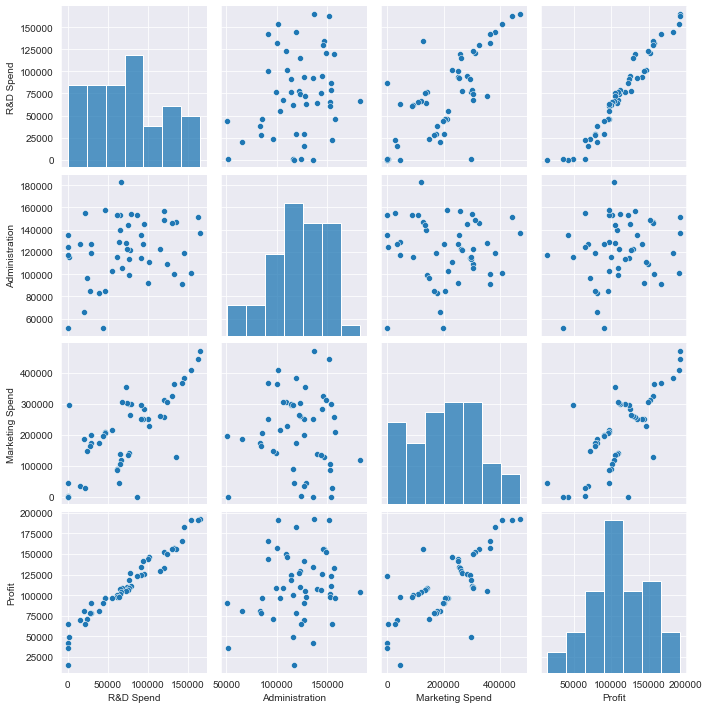

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(SU)

In [6]:
SU = SU.rename(columns={'R&D Spend': 'Rnd_spend', 'Marketing Spend': 'Marketing_Spend'})
SU

,Rnd_spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rnd_spend', ylabel='Density'>

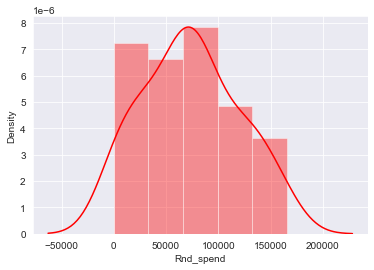

In [7]:
sns.distplot(SU['Rnd_spend'],color='red')

C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing_Spend', ylabel='Density'>

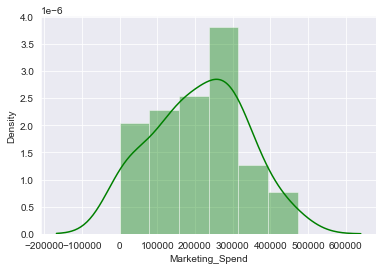

In [8]:
sns.distplot(SU['Marketing_Spend'],color='green')

C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

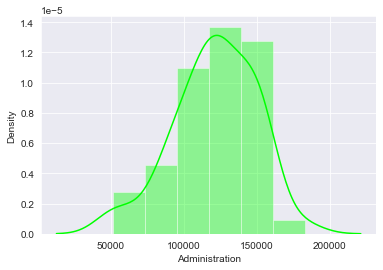

In [9]:
sns.distplot(SU['Administration'],color='lime')

C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

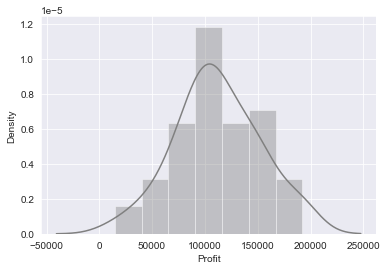

In [10]:
sns.distplot(SU['Profit'],color='grey')

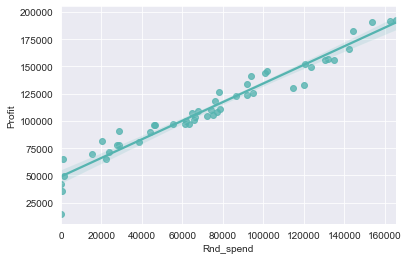

In [12]:
sns.regplot(x="Rnd_spend", y="Profit", data=SU,color='#55B4B0');

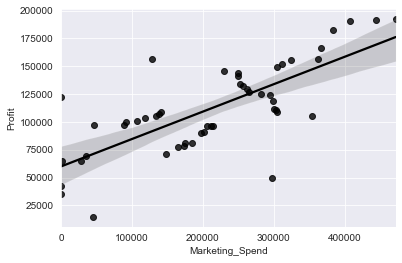

In [13]:
sns.regplot(x="Marketing_Spend", y="Profit", data=SU,color='black');

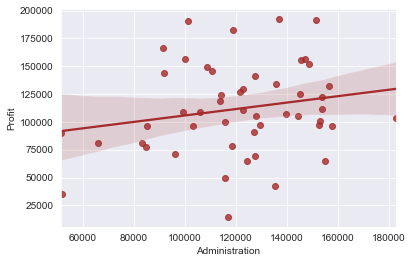

In [14]:
sns.regplot(x="Administration", y="Profit", data=SU,color='brown');

In [67]:
#Build model
#Removing state as it is irrelevant to this model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~ Rnd_spend+Marketing_Spend+Administration',data=SU).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.53e-30
Time:                        15:02:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Rnd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ml_m=smf.ols('Profit~ Marketing_Spend',data=SU).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  
ml_m.summary()

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.38e-10
Time:                        15:01:26   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
ml_r=smf.ols('Profit~ Rnd_spend',data=SU).fit()  
print(ml_r.tvalues, '\n', ml_r.pvalues)  
ml_r.summary()

Intercept    19.320288
Rnd_spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
Rnd_spend    3.500322e-32
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           3.50e-32
Time:                        19:15:15   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
Rnd_spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
ml_a=smf.ols('Profit~ Administration',data=SU).fit()  
print(ml_a.tvalues, '\n', ml_a.pvalues)  
ml_a.summary()

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 11 Nov 2021   Prob (F-statistic):              0.162
Time:                        19:15:24   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
rsq_rnd = smf.ols('Rnd_spend ~ Marketing_Spend+Administration',data=SU).fit().rsquared  
vif_rnd = 1/(1-rsq_rnd)
rsq_rnd,vif_rnd

(0.5949618224573936, 2.4689030699947017)

In [39]:
rsq_ms = smf.ols('Marketing_Spend ~  Rnd_spend +Administration',data=SU).fit().rsquared  
vif_ms = 1/(1-rsq_ms)
rsq_ms,vif_ms

(0.5702202685282503, 2.3267732905308773)

In [40]:
rsq_a = smf.ols('Administration ~  Rnd_spend +Marketing_Spend',data=SU).fit().rsquared  
vif_a = 1/(1-rsq_a)
rsq_a,vif_a

(0.14900208239517554, 1.1750910070550458)

In [43]:
DF = {'Variables':['Rnd_spend','M_Spend','Adm'],'VIF':[vif_rnd,vif_ms,vif_a]}
Vif_frame = pd.DataFrame(DF)  
Vif_frame

,Variables,VIF
0,Rnd_spend,2.468903
1,M_Spend,2.326773
2,Adm,1.175091


In [ ]:
All three factors are correlated to profit atleast 

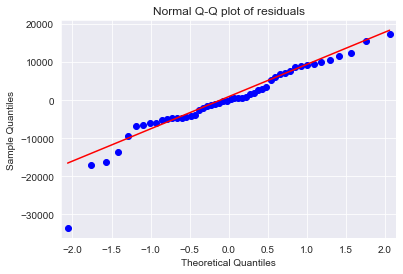

In [51]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [54]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [58]:
SU_new=SU.drop(SU.index[49],axis=0).reset_index()
SU_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            49 non-null     int64  
 1   Rnd_spend        49 non-null     float64
 2   Administration   49 non-null     float64
 3   Marketing_Spend  49 non-null     float64
 4   State            49 non-null     object 
 5   Profit           49 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.4+ KB


In [95]:
# Administration values are dropped since it is not efficiently correlated to profit
model2=smf.ols('Profit~ Rnd_spend+Marketing_Spend',data=SU_new).fit()

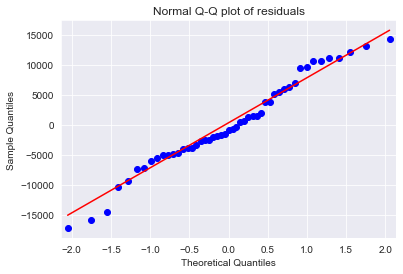

In [96]:
qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [97]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           3.74e-33
Time:                        18:39:24   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
Rnd_spend           0.7754      0.035     22.136      0.000       0.705       0.846
Marketing_Spend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
DF2 = {'Variables':['Model_Basic','Profit_RnDspend','Profit_Marketingspend','Profit_Administartion','Model_RemovingResidualandAdministartion'],
       'RSquared_Value':[model.rsquared,ml_r.rsquared,ml_m.rsquared,ml_a.rsquared,model2.rsquared]}
Rquared_frame = pd.DataFrame(DF2)  
Rquared_frame

,Variables,RSquared_Value
0,Model_Basic,0.950746
1,Profit_RnDspend,0.946535
2,Profit_Marketingspend,0.559154
3,Profit_Administartion,0.040287
4,Model_RemovingResidualandAdministartion,0.961086


In [100]:
DF3=pd.DataFrame({"Rnd_spend":80000,"Marketing_Spend":400000},index=[1])
model2.predict(DF3)

1    122794.183179
dtype: float64

# Answer 2 - TOYOTA

In [104]:
Price = pd.read_csv('ToyotaCorolla.csv')
Price.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [106]:
Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [107]:
data = [Price["Price"], Price["Age_08_04"],Price["KM"],Price["HP"],Price["cc"],Price["Doors"],Price["Gears"],Price["Quarterly_Tax"],Price["Weight"]]

In [108]:
headers = ["Price", "Age","KM","HP","CC","Doors","Gears","Tax","Weight"]

In [110]:
price_new = pd.concat(data, axis=1, keys=headers)
price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

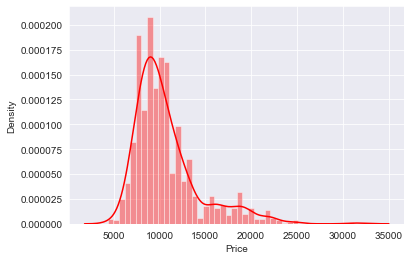

In [114]:
sns.distplot(price_new['Price'],color='red')

In [124]:
price_new['Sqrt_Price'] =  np.sqrt(price_new['Price'])

<AxesSubplot:xlabel='Sqrt_Price', ylabel='Density'>

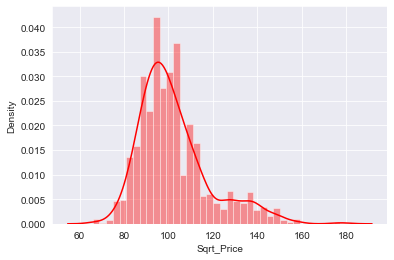

In [125]:
sns.distplot(price_new['Sqrt_Price'],color='red')

In [126]:
price_new

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight,Log_Price,Sqrt_Price
0,13500,23,46986,90,2000,3,5,210,1165,4.130334,116.189500
1,13750,23,72937,90,2000,3,5,210,1165,4.138303,117.260394
2,13950,24,41711,90,2000,3,5,210,1165,4.144574,118.110118
3,14950,26,48000,90,2000,3,5,210,1165,4.174641,122.270193
4,13750,30,38500,90,2000,3,5,210,1170,4.138303,117.260394
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,3.875061,86.602540
1432,10845,72,19000,86,1300,3,5,69,1015,4.035230,104.139330
1433,8500,71,17016,86,1300,3,5,69,1015,3.929419,92.195445
1434,7250,70,16916,86,1300,3,5,69,1015,3.860338,85.146932


In [127]:
price_new = price_new.drop(columns=['Sqrt_Price','Log_Price'])
price_new

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [130]:
ml_age=smf.ols('Price~ Age',data=price_new).fit()  
print(ml_age.tvalues, '\n', ml_age.pvalues)  
ml_age.summary()

Intercept    138.907847
Age          -68.978267
dtype: float64 
 Intercept    0.0
Age          0.0
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:15:39   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
ml_km=smf.ols('Price~ KM',data=price_new).fit()  
print(ml_km.tvalues, '\n', ml_km.pvalues)  
ml_km.summary()

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          1.76e-124
Time:                        19:16:24   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
ml_hp=smf.ols('Price~ HP',data=price_new).fit()  
print(ml_hp.tvalues, '\n', ml_hp.pvalues)  
ml_hp.summary()

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.93e-34
Time:                        19:16:57   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
ml_doors=smf.ols('Price~ Doors',data=price_new).fit()  
print(ml_doors.tvalues, '\n', ml_doors.pvalues)  
ml_doors.summary()

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.46e-12
Time:                        19:17:23   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
ml_cc=smf.ols('Price~ CC',data=price_new).fit()  
print(ml_cc.tvalues, '\n', ml_cc.pvalues)  
ml_cc.summary()

Intercept    24.694090
CC            4.824822
dtype: float64 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.55e-06
Time:                        19:18:04   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
CC             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
ml_gears=smf.ols('Price~ Gears',data=price_new).fit()  
print(ml_gears.tvalues, '\n', ml_gears.pvalues)  
ml_gears.summary()

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Thu, 11 Nov 2021   Prob (F-statistic):             0.0168
Time:                        19:18:46   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
ml_tax=smf.ols('Price~ Tax',data=price_new).fit()  
print(ml_tax.tvalues, '\n', ml_tax.pvalues)  
ml_tax.summary()

Intercept    41.330311
Tax           8.507487
dtype: float64 
 Intercept    1.532168e-246
Tax           4.407393e-17
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.41e-17
Time:                        19:19:10   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9046.7382    218.889     41.330      0.000    8617.362    9476.115
Tax           19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
ml_W=smf.ols('Price~ Weight',data=price_new).fit()  
print(ml_W.tvalues, '\n', ml_W.pvalues)  
ml_W.summary()

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          1.63e-130
Time:                        19:19:49   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
model_car = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+Tax+Weight', data = price_new).fit()

In [139]:
model_car.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:23:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
# Since Doors,Gears, Tax and CC are not efficiently correlated therefore dropping the columns
model_car2 = smf.ols('Price ~ Age+HP+KM+Weight', data = price_new).fit()
model_car2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:35:47   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
Age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
HP            30.2119      2.539     11.897      0.000      25.230      35.193
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

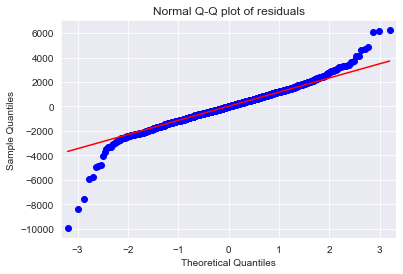

In [143]:
qqplot=sm.qqplot(model_car2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [147]:
list(np.where(model_car2.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960, 991], dtype=int64)]

In [149]:
price2=price_new.drop(price_new.index[[191, 192, 221, 393, 402, 601, 654, 960, 991]],axis=0).reset_index()
price2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   1427 non-null   int64
 1   Price   1427 non-null   int64
 2   Age     1427 non-null   int64
 3   KM      1427 non-null   int64
 4   HP      1427 non-null   int64
 5   CC      1427 non-null   int64
 6   Doors   1427 non-null   int64
 7   Gears   1427 non-null   int64
 8   Tax     1427 non-null   int64
 9   Weight  1427 non-null   int64
dtypes: int64(10)
memory usage: 111.6 KB


In [150]:
model_car3 = smf.ols('Price ~ Age+HP+KM+Weight', data = price2).fit()
model_car3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2720.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:42:41   Log-Likelihood:                -12178.
No. Observations:                1427   AIC:                         2.437e+04
Df Residuals:                    1422   BIC:                         2.439e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9333.5166    938.243     -9.948      0.000   -1.12e+04   -7493.027
Age         -114.5539      2.483    -46.141      0.000    -119.424    -109.684
HP            25.7100      2.337     11.000      0.000      21.125      30.295
KM            -0.0216      0.001    -19.213      0.000      -0.024      -0.019
Weight        23.6728      0.816     29.016      0.000      22.072      25.273
==============================================================================
Omnibus:                       45.189   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.429
Skew:                           0.281   Prob(JB):                     3.09e-16
Kurtosis:                       3.941   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

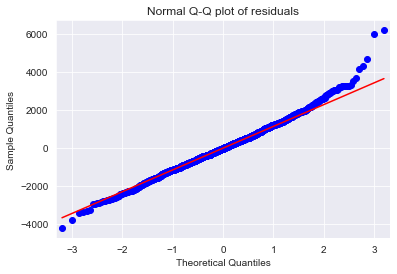

In [151]:
qqplot=sm.qqplot(model_car3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [170]:
list(np.where(model_car3.resid>5500))

[array([147, 518], dtype=int64)]

In [172]:
price3=price2.drop(price2.index[[147,518]],axis=0).reset_index()
price3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   level_0  1425 non-null   int64
 1   index    1425 non-null   int64
 2   Price    1425 non-null   int64
 3   Age      1425 non-null   int64
 4   KM       1425 non-null   int64
 5   HP       1425 non-null   int64
 6   CC       1425 non-null   int64
 7   Doors    1425 non-null   int64
 8   Gears    1425 non-null   int64
 9   Tax      1425 non-null   int64
 10  Weight   1425 non-null   int64
dtypes: int64(11)
memory usage: 122.6 KB


In [173]:
model_car4 = smf.ols('Price ~ Age+HP+KM+Weight', data = price3).fit()
model_car4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     2782.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:49:28   Log-Likelihood:                -12137.
No. Observations:                1425   AIC:                         2.428e+04
Df Residuals:                    1420   BIC:                         2.431e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9273.2541    922.793    -10.049      0.000   -1.11e+04   -7463.070
Age         -114.1322      2.443    -46.709      0.000    -118.925    -109.339
HP            25.5622      2.298     11.122      0.000      21.054      30.071
KM            -0.0215      0.001    -19.467      0.000      -0.024      -0.019
Weight        23.5956      0.802     29.406      0.000      22.022      25.170
==============================================================================
Omnibus:                       11.110   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.506
Skew:                           0.149   Prob(JB):                      0.00192
Kurtosis:                       3.349   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

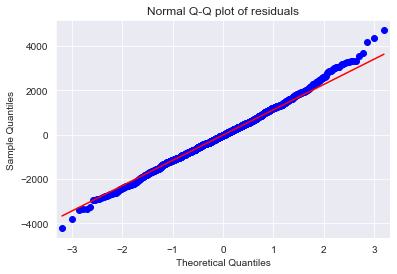

In [174]:
qqplot=sm.qqplot(model_car4.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [179]:
price4 = price3.drop(columns=['CC','Tax','Doors','Gears','level_0','index'])
price4.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [182]:
model_car5=smf.ols('Price~Age+KM+HP+Weight',data=price4).fit()
model_car5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     2782.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:58:53   Log-Likelihood:                -12137.
No. Observations:                1425   AIC:                         2.428e+04
Df Residuals:                    1420   BIC:                         2.431e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9273.2541    922.793    -10.049      0.000   -1.11e+04   -7463.070
Age         -114.1322      2.443    -46.709      0.000    -118.925    -109.339
KM            -0.0215      0.001    -19.467      0.000      -0.024      -0.019
HP            25.5622      2.298     11.122      0.000      21.054      30.071
Weight        23.5956      0.802     29.406      0.000      22.022      25.170
==============================================================================
Omnibus:                       11.110   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.506
Skew:                           0.149   Prob(JB):                      0.00192
Kurtosis:                       3.349   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
DF4=pd.DataFrame({"Age":15,"KM":40000,"HP":100,"Weight":1300},index=[1])

In [183]:
model_car5.predict(DF4)

1    21384.974851
dtype: float64